## Exercise 2
### Question 1

In [1]:
import numpy as np
import cv2
import sys
import os

In [2]:
filter = [
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
]

In [3]:
def apply_filter(mat, filter):
    # convert the matrix to float
    mat = mat.astype(np.float)

    # construct sub matrices for convolution
    view_shape = tuple(np.subtract(mat.shape, filter.shape) + 1) + filter.shape
    strides = mat.strides + mat.strides
    sub_matrices = np.lib.stride_tricks.as_strided(mat, view_shape, strides)

    # convolve
    mat = np.einsum('ij,klij->kl', filter, sub_matrices)

    # clip out of bound values
    v_clip = np.vectorize(clip)
    mat = v_clip(mat)

    return mat.astype(np.uint8)


The clipping function ensures that we stay in bounds:

In [11]:
def clip(new_value):
    if new_value > 255:
        new_value = 255
    elif new_value < 0:
        new_value = 0
    return new_value

In [12]:
image_path = "lena.jpg"

We proceed to read the image and apply the filter:

In [13]:
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img = apply_filter(img, np.asarray(filter))
filtered = f"filtered_{image_path.split('.')[0]}.png"
cv2.imwrite(filtered, img)

True

And display the filtered image:

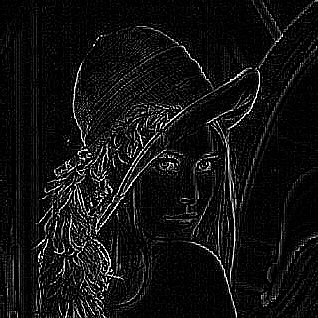

In [14]:
from IPython.display import Image 
display(Image(filename=filtered))

As we can see, this filter is used to detect edges.